# Importing Libraries

This cell imports the necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
# Import libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

This cell loads the dataset and displays its shape.

In [ ]:
# Load the dataset from the specified path
data = pd.read_csv(r'C:\Users\AL-Renad\Documents\playing\mlproj\studing\data\Orange_Telecom_Churn_Data.csv')

# Display the shape of the dataset (rows, columns)
data.shape


(5000, 21)

This cell counts the occurrences of each state in the dataset.

In [ ]:
# Count the occurrences of each state in the dataset
data.state.value_counts()

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64

This cell removes the `state` column and displays the first few rows of the dataset.

In [ ]:
# Drop the 'state' column as it is not needed
data = data.drop(columns=['state'])

# Display the first few rows of the dataset
data.head()

,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


This cell provides information about the dataset, including column data types and non-null counts.

In [ ]:
# Display information about the dataset
# Includes column names, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

This cell converts the `phone_number` column to integers by removing dashes.

In [ ]:
# Remove dashes from 'phone_number' and convert to integers
data['phone_number'] = data['phone_number'].str.replace('-', '').astype(int)

# Display the first few rows to verify changes
data.head()

,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,415,3824657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,3717191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,3581921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,3759999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,3306626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


This cell encodes categorical columns into numerical values.

In [ ]:
# Encode categorical columns into numerical values
# 'intl_plan' and 'voice_mail_plan' are converted to numerical codes
data['intl_plan'] = data['intl_plan'].astype('category').cat.codes
data['voice_mail_plan'] = data['voice_mail_plan'].astype('category').cat.codes

# Display the first few rows to verify changes
data.head()

,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,415,3824657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,3717191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,3581921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,3759999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,3306626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


This cell creates a copy of the dataset for further processing.

In [ ]:
# Create a copy of the dataset for further processing
dataencoded = data

This cell counts the occurrences of the target variable `churned`.

In [ ]:
# Count the occurrences of the target variable 'churned'
dataencoded.churned.value_counts()

False    4293
True      707
Name: churned, dtype: int64

This cell counts the occurrences of the `voice_mail_plan` variable.

In [ ]:
# Count the occurrences of the 'voice_mail_plan' variable
dataencoded.voice_mail_plan.value_counts()

0    3677
1    1323
Name: voice_mail_plan, dtype: int64

This cell counts the occurrences of the `intl_plan` variable.

In [ ]:
# Count the occurrences of the 'intl_plan' variable
dataencoded.intl_plan.value_counts()

0    4527
1     473
Name: intl_plan, dtype: int64

This cell provides information about the encoded dataset, including column data types and non-null counts.

In [ ]:
# Display information about the encoded dataset
# Includes column names, data types, and non-null counts
dataencoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   area_code                      5000 non-null   int64  
 2   phone_number                   5000 non-null   int32  
 3   intl_plan                      5000 non-null   int8   
 4   voice_mail_plan                5000 non-null   int8   
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

This cell checks for duplicate rows in the dataset.

In [ ]:
# Check for duplicate rows in the dataset
dataencoded.duplicated().sum()

0

This cell provides a statistical summary of the dataset.

In [64]:
# Get a statistical summary of the dataset
dataencoded.describe()

,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,3.752604e+06,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,2.744997e+05,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,3.513982e+06,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,3.758538e+06,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,3.993312e+06,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,4.229964e+06,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


This cell displays the column names of the dataset.

In [65]:
# Display column names
dataencoded.columns

Index(['account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

This cell checks for missing values in the dataset.

In [66]:
# Check for NA data
print(dataencoded.isna().sum())

account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64


This cell checks for null values in the dataset.

In [67]:
dataencoded.isnull().sum()

account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

This cell visualizes the correlation matrix of the dataset using a heatmap.

Text(0.5, 1.0, 'Correlation Heatmap')

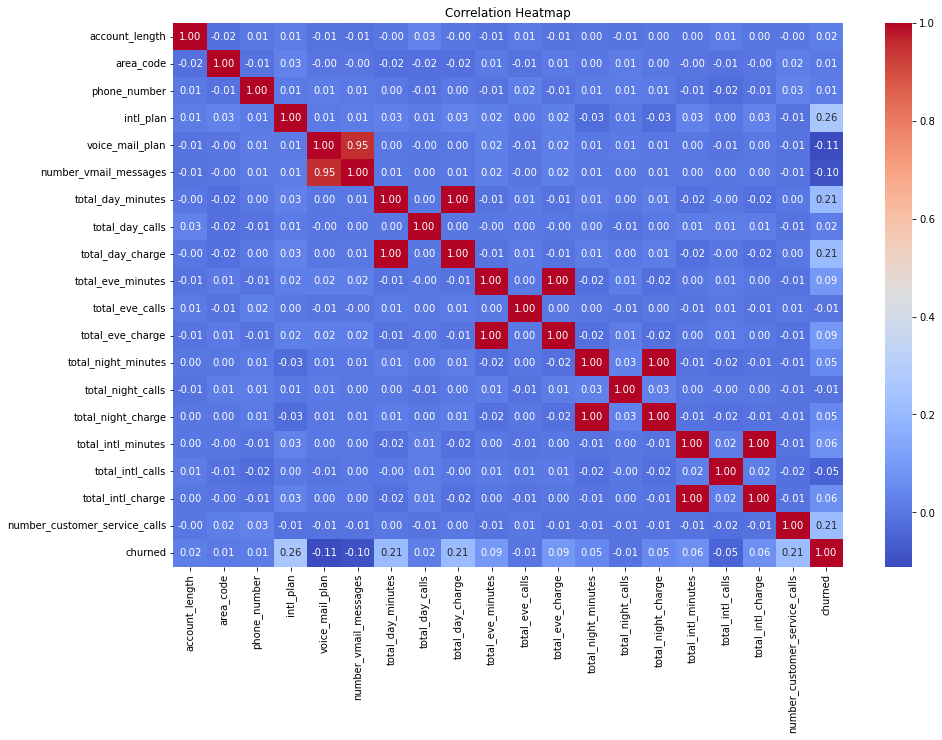

In [68]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataencoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

This cell visualizes the distribution of numerical features in the dataset.

<Figure size 864x576 with 0 Axes>

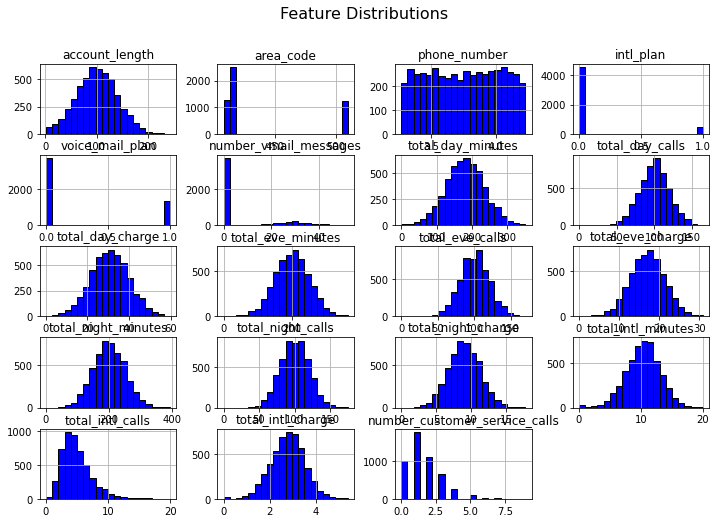

In [69]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
dataencoded.hist(bins=20, figsize=(12, 8), color='b', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

This cell splits the dataset into features (X) and target (y).

In [45]:
# Split the dataset into features (X) and target (y)
X = dataencoded.iloc[:, :-1]
print(X.shape)
y = data.iloc[:, -1]
print(y.shape)

(5000, 19)
(5000,)


This cell displays the feature column names.

In [71]:
# Display feature column names
X.columns

Index(['account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

This cell selects the top 80% of features based on the chi-squared test.

In [46]:
from sklearn.feature_selection import SelectPercentile,chi2
seclcpe=SelectPercentile(chi2, percentile=80)
X_new=seclcpe.fit(X,y)
X=X_new.transform(X)
X.shape


(5000, 15)

This cell displays the selected features.

In [9]:
X_new.get_support()

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True])

This cell scales the features using MinMaxScaler.

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# stds=StandardScaler()
# X=stds.fit_transform(X,y)
minm=MinMaxScaler()
X=minm.fit_transform(X,y)

This cell splits the dataset into training and testing sets.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (3750, 15)
Testing features shape: (1250, 15)
Training target shape: (3750,)
Testing target shape: (1250,)


This cell shows the features of the first row.

In [27]:
# Show the features of the first row
print("Features of the first row:")
print(data.iloc[15, :])

Features of the first row:
account_length                        161
area_code                             415
phone_number                     351-7269
number_vmail_messages                   0
total_day_minutes                   332.9
total_day_calls                        67
total_day_charge                    56.59
total_eve_minutes                   317.8
total_eve_calls                        97
total_eve_charge                    27.01
total_night_minutes                 160.6
total_night_calls                     128
total_night_charge                   7.23
total_intl_minutes                    5.4
total_intl_calls                        9
total_intl_charge                    1.46
number_customer_service_calls           4
churned                              True
Name: 15, dtype: object


This cell trains a Random Forest model to predict churn and evaluates its performance.

1.0
0.9568
              precision    recall  f1-score   support

       False       0.96      0.99      0.98      1076
        True       0.92      0.76      0.83       174

    accuracy                           0.96      1250
   macro avg       0.94      0.87      0.90      1250
weighted avg       0.96      0.96      0.96      1250

[[1064   12]
 [  42  132]]


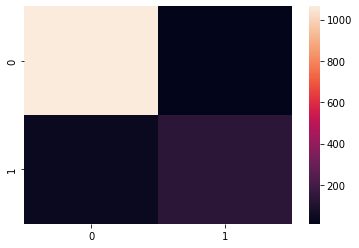

In [14]:
# Train a regression model to predict churn
model = RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell visualizes feature importance from the Random Forest model.

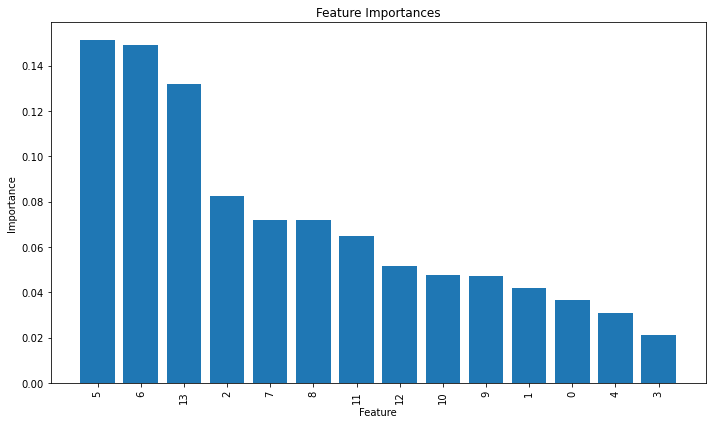

In [15]:
# Visualize feature importance from the Random Forest model
X=pd.DataFrame(X)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

This cell trains a Random Forest model using MinMaxScaler and evaluates its performance.

1.0
0.956
              precision    recall  f1-score   support

       False       0.96      0.99      0.97      1076
        True       0.92      0.75      0.83       174

    accuracy                           0.96      1250
   macro avg       0.94      0.87      0.90      1250
weighted avg       0.95      0.96      0.95      1250

[[1064   12]
 [  43  131]]


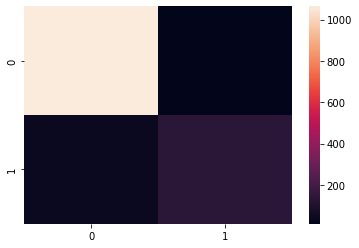

In [ ]:
# Train minmax
model = RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Decision Tree model to predict churn and evaluates its performance.

1.0
0.936
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1076
        True       0.76      0.78      0.77       174

    accuracy                           0.94      1250
   macro avg       0.86      0.87      0.87      1250
weighted avg       0.94      0.94      0.94      1250

[[1034   42]
 [  38  136]]


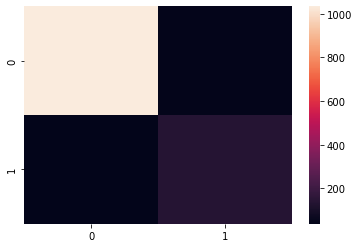

In [20]:
model = DecisionTreeClassifier(criterion='log_loss',random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Decision Tree model using MinMaxScaler and evaluates its performance.

1.0
0.9304
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1076
        True       0.75      0.74      0.75       174

    accuracy                           0.93      1250
   macro avg       0.86      0.85      0.85      1250
weighted avg       0.93      0.93      0.93      1250

[[1034   42]
 [  45  129]]


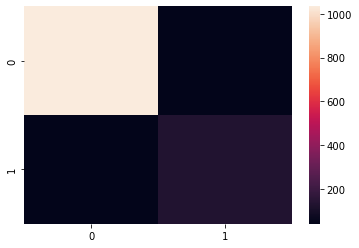

In [50]:
#minmax scal
model = DecisionTreeClassifier(criterion='log_loss',random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a K-Nearest Neighbors model to predict churn and evaluates its performance.

0.908
0.8984
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      1076
        True       0.87      0.32      0.46       174

    accuracy                           0.90      1250
   macro avg       0.89      0.65      0.70      1250
weighted avg       0.90      0.90      0.88      1250

[[1068    8]
 [ 119   55]]


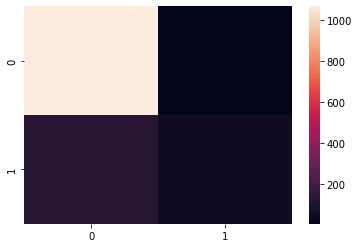

In [24]:
# Train a regression model to predict churn
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Logistic Regression model to predict churn and evaluates its performance.

0.864
0.868
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      1076
        True       0.56      0.26      0.35       174

    accuracy                           0.87      1250
   macro avg       0.72      0.61      0.64      1250
weighted avg       0.84      0.87      0.85      1250

[[1040   36]
 [ 129   45]]


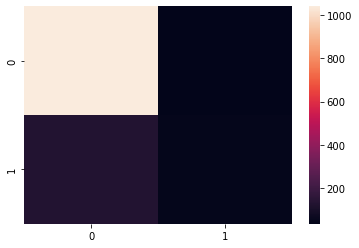

In [28]:
model = LogisticRegression(penalty='l2',random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Multi-Layer Perceptron model to predict churn and evaluates its performance.

c:\Users\AL-Renad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9901333333333333
0.944
              precision    recall  f1-score   support

       False       0.96      0.97      0.97      1076
        True       0.82      0.76      0.79       174

    accuracy                           0.94      1250
   macro avg       0.89      0.87      0.88      1250
weighted avg       0.94      0.94      0.94      1250

[[1047   29]
 [  41  133]]


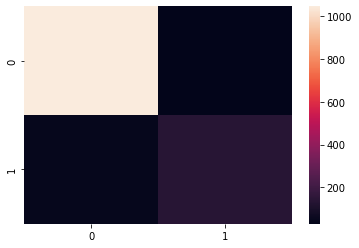

In [33]:
model = MLPClassifier(hidden_layer_sizes=1000,random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Support Vector Classifier model to predict churn and evaluates its performance.

0.9541333333333334
0.9344
              precision    recall  f1-score   support

       False       0.94      0.99      0.96      1076
        True       0.88      0.61      0.72       174

    accuracy                           0.93      1250
   macro avg       0.91      0.80      0.84      1250
weighted avg       0.93      0.93      0.93      1250

[[1062   14]
 [  68  106]]


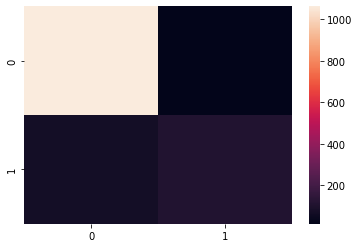

In [39]:
from sklearn.svm import SVC
model = SVC(kernel="rbf",random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Gaussian Naive Bayes model to predict churn and evaluates its performance.

0.8717333333333334
0.8584
              precision    recall  f1-score   support

       False       0.93      0.91      0.92      1076
        True       0.49      0.56      0.53       174

    accuracy                           0.86      1250
   macro avg       0.71      0.73      0.72      1250
weighted avg       0.87      0.86      0.86      1250

[[975 101]
 [ 76  98]]


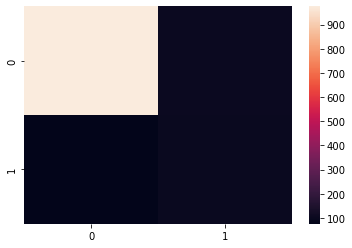

In [44]:
model = GaussianNB()
# model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Bernoulli Naive Bayes model using MinMaxScaler and evaluates its performance.

0.8544
0.8496
              precision    recall  f1-score   support

       False       0.88      0.96      0.92      1076
        True       0.41      0.18      0.25       174

    accuracy                           0.85      1250
   macro avg       0.64      0.57      0.59      1250
weighted avg       0.81      0.85      0.82      1250

[[1030   46]
 [ 142   32]]


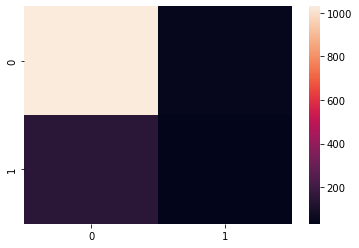

In [51]:
# minmaxscaler
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell trains a Quadratic Discriminant Analysis model to predict churn and evaluates its performance.

0.8784
0.8608
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      1076
        True       0.50      0.52      0.51       174

    accuracy                           0.86      1250
   macro avg       0.71      0.72      0.72      1250
weighted avg       0.86      0.86      0.86      1250

[[985  91]
 [ 83  91]]


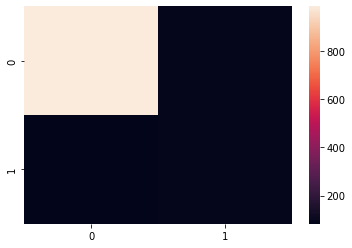

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
# model = LinearDiscriminantAnalysis(solver='lsqr')
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

This cell performs hierarchical clustering on the training set and visualizes the dendrogram.

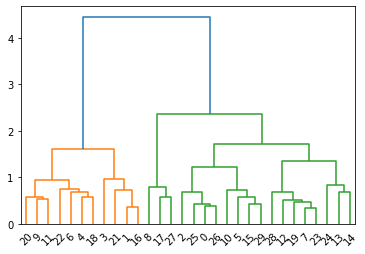

In [56]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=2)
y_pred_train = agg.fit_predict(X_train)
y_pred_test = agg.fit_predict(X_test)

dendrog=sch.dendrogram(sch.linkage(X_train[:30,:],method='ward'))

This cell visualizes the dendrogram for the testing set.

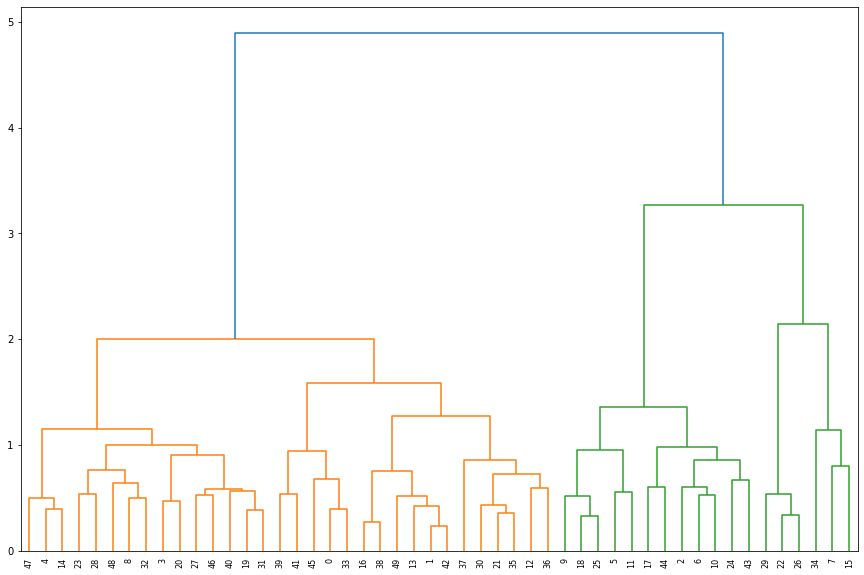

In [58]:
plt.figure(figsize=(15,10))
dendtest=sch.dendrogram(sch.linkage(X_test[:50,:],method='ward'))

This cell visualizes the clusters in the training set using a scatter plot.

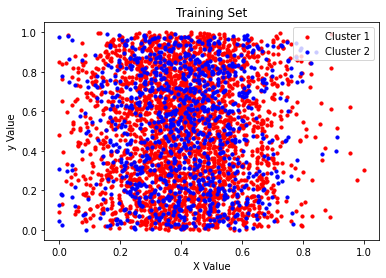

In [68]:
#draw the Scatter for Train set
plt.scatter(X_train[y_pred_train == 0, 0], X_train[y_pred_train == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_pred_train == 1, 0], X_train[y_pred_train == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# pltn[y_pred_train == 2, 0], X_train[y_pred_train == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(X_train[y_pred_train == 3, 0], X_train[y_pred_train == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_train[y_pred_t.scatter(X_trairain == 4, 0], X_train[y_pred_train == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.title('Training Set')
plt.xlabel('X Value')
plt.ylabel('y Value')
plt.legend()
plt.show()


This cell performs K-Means clustering on the training set and visualizes the clusters using a scatter plot.

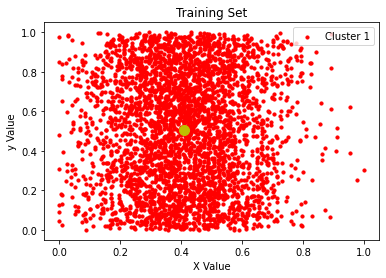

In [71]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=1,init="k-means++")
y_pred=kmeans.fit_predict(X_train)
#draw the Scatter for Train set
plt.scatter(X_train[y_pred == 0, 0], X_train[y_pred == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
# plt.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(X_train[y_pred == 2, 0], X_train[y_pred == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(X_train[y_pred == 3, 0], X_train[y_pred == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'y')
plt.title('Training Set')
plt.xlabel('X Value')
plt.ylabel('y Value')
plt.legend()
plt.show()